<a href="https://colab.research.google.com/github/cariacosta/Dashboard/blob/notebooks/dashboard_generative_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Herramientas de IA generativa - **Plataformas**

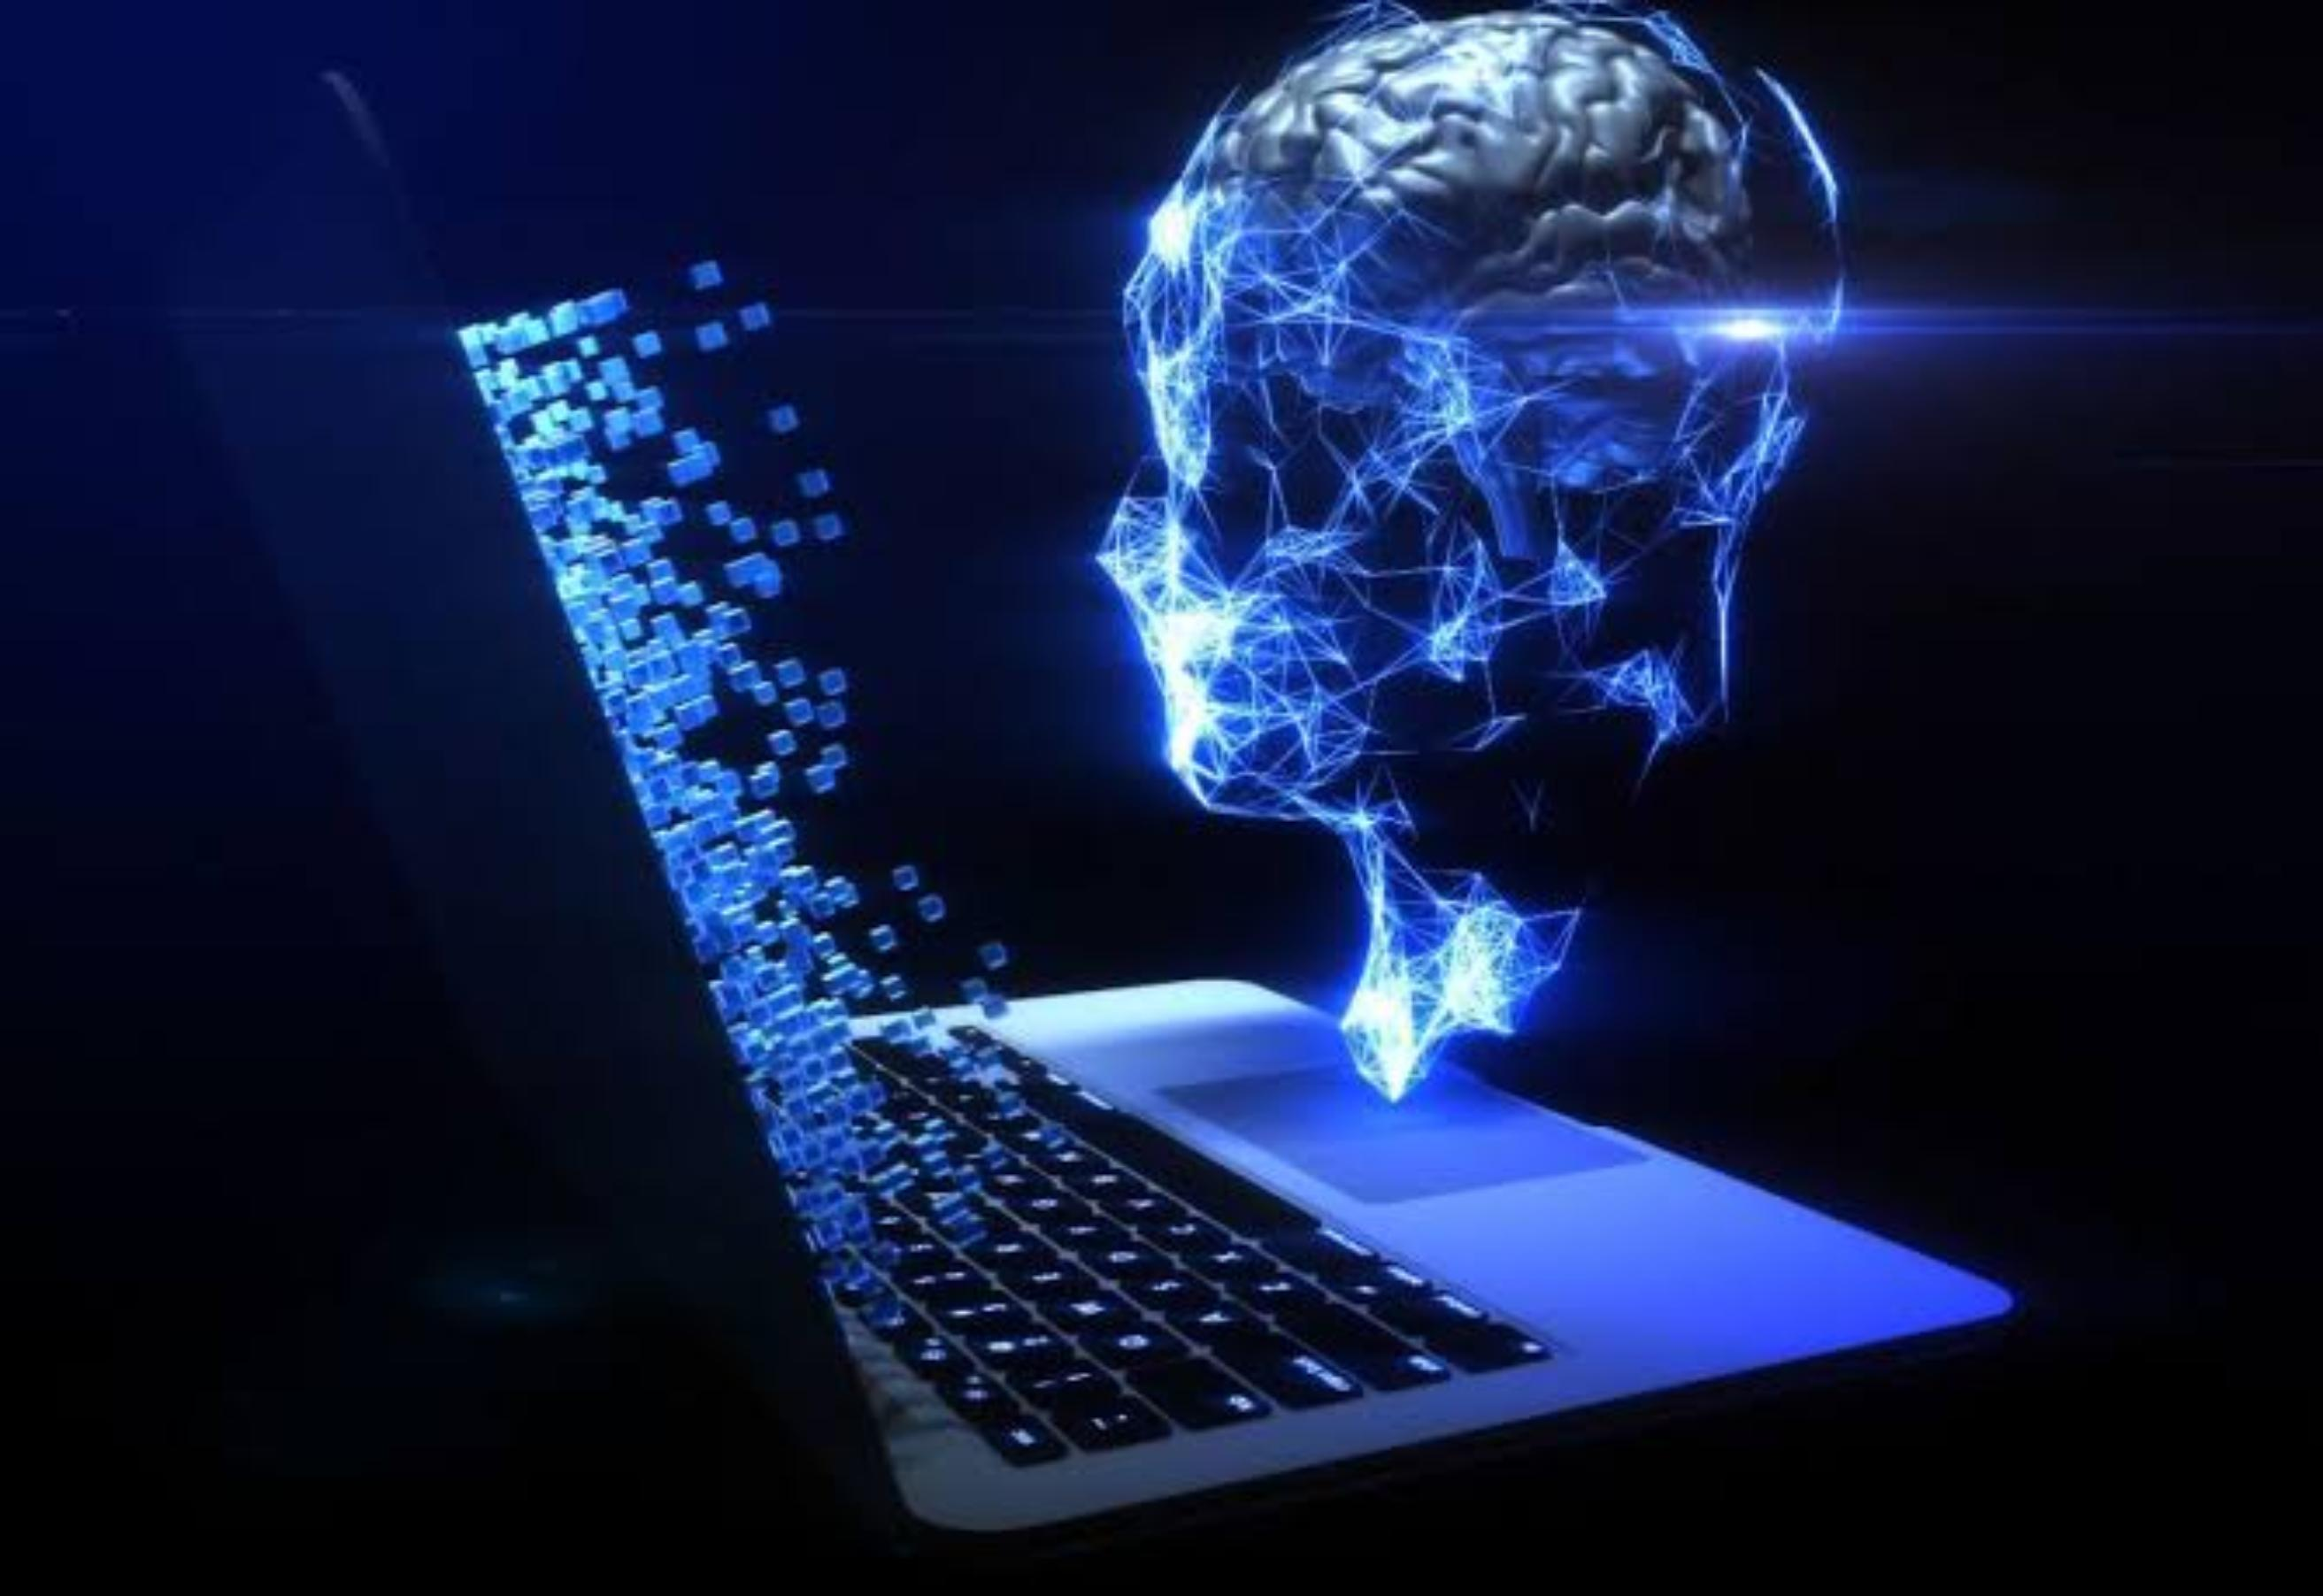

---



#**Dashboard**

Autores:
Acosta, Carina
Zarate, jorge

**Objetivo**: Adquirir experiencia practica en el ciclo completo de trabajo con datos. Crear, paso a paso, un dashboard interactivo usando Plotly en una notebook de Collab.

Lo que vamos a hacer:

Cargar un dataset desde una fuente pública utlizamos: https://www.kaggle.com/
-Almacenamiento en una base de datos realcional
-Construir visualizaciones básicas (línea, barras, dispersión).
-Combinar gráficos en un layout tipo dashboard.
El notebook contiene:

Instalación de librerías
Carga de datos
Limpieza
Conexión a MySQL  
Visualizaciones con Plotly
Análisis de los últimos 5 años
Conclusiones

Este notebook carga, limpia y analiza el dataset de herramientas de Inteligencia Artificial Generativa desde el 2013 hasta el 2025

Dataset:
https://www.kaggle.com/datasets/tarekmasryo/generative-ai-tools-and-platforms-2025/data.csv

Este conjunto de datos estructurado de herramientas y plataformas de IA generativa hasta el año 2025, es elegido  para la investigación, el análisis y la creación de modelos.
Cada entrada incluye  proveedor, categoría canónica, capacidades de modalidad (indicadores binarios), estado de API y código abierto, sitio web oficial y cronograma de lanzamiento.
Ideal para análisis de mercado, benchmarking, paneles de control y prototipos de aprendizaje automático, como recomendadores de herramientas o puntuación de capacidades.


Instalación de dependencias

In [ ]:
# Ejecutar en Colab una sola vez
!pip install pandas plotly sqlalchemy mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 35.2 MB/s eta 0:00:00


In [ ]:
#Importar librerías
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns  # grafico

pd.set_option("display.max_columns", None)

In [ ]:
!pip install geocoder

In [ ]:
#Cargar datos
# Ruta al archivo CSV  dentro de Github
url = "https://raw.githubusercontent.com/cariacosta/Dashboard/refs/heads/data/generative_ai_tools_and_platforms_2025_sample.csv"

# Leer el CSV
df = pd.read_csv(url)
print("Filas y columnas:", df.shape)
df.head()


Filas y columnas: (113, 22)


,tool_name,company,category_canonical,modality_canonical,open_source,api_available,api_status,website,source_domain,release_year,years_since_release,mod_text,mod_image,mod_video,mod_audio,mod_code,mod_design,mod_infra,mod_productivity,mod_safety,mod_multimodal,modality_count
0,ChatGPT,OpenAI,LLMs & Chat Assistants,multimodal,0,1,api,https://chatgpt.com,chatgpt.com,2022,3,0,0,0,0,0,0,0,0,0,1,0
1,Claude,Anthropic,LLMs & Chat Assistants,multimodal,0,1,api,https://claude.ai,claude.ai,2023,2,0,0,0,0,0,0,0,0,0,1,0
2,Gemini,Google,LLMs & Chat Assistants,multimodal,0,1,api,https://gemini.google.com,gemini.google.com,2023,2,0,0,0,0,0,0,0,0,0,1,0
3,Midjourney,Midjourney,Image Gen & Editing,image,0,0,unavailable,https://www.midjourney.com,midjourney.com,2022,3,0,1,0,0,0,0,0,0,0,0,1
4,Stable Diffusion,Stability AI,Image Gen & Editing,image,1,1,api,https://stability.ai/stable-image,stability.ai,2022,3,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
#vemos que tipo de datos tenemos
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tool_name            113 non-null    object
 1   company              113 non-null    object
 2   category_canonical   113 non-null    object
 3   modality_canonical   113 non-null    object
 4   open_source          113 non-null    int64 
 5   api_available        113 non-null    int64 
 6   api_status           113 non-null    object
 7   website              113 non-null    object
 8   source_domain        113 non-null    object
 9   release_year         113 non-null    int64 
 10  years_since_release  113 non-null    int64 
 11  mod_text             113 non-null    int64 
 12  mod_image            113 non-null    int64 
 13  mod_video            113 non-null    int64 
 14  mod_audio            113 non-null    int64 
 15  mod_code             113 non-null    int64 
 16  mod_desi

#Limpieza de los Datos
-Datos Faltantes
-filas repetidas
-Errores tipograficos

In [ ]:
#Limpieza
df.dropna(inplace=True)
df.info()


In [ ]:
# revison busqueda de duplidcados
print(f'Tamaño del set :{df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set luego de boraar los Duplicados:{df.shape}')

Tamaño del set :(113, 22)
Tamaño del set luego de boraar los Duplicados:(113, 22)


In [ ]:
# revison busqueda de datos irrelevantes, redundantes
col_categoria = ['tool_name','company','category_canonical','modality_canonical','open_source','api_available','api_status','website','source_domain','release_year','years_since_release','mod_text','mod_image','mod_video','mod_audio','mod_code','mod_design','mod_infra','mod_productivity','mod_safety','mod_multimodal','modality_count']

for col in col_categoria:
  print(f'columna {col}: {df[col].nunique()} Subniveles')

columna tool_name: 113 Subniveles
columna company: 83 Subniveles
columna category_canonical: 13 Subniveles
columna modality_canonical: 10 Subniveles
columna open_source: 2 Subniveles
columna api_available: 2 Subniveles
columna api_status: 2 Subniveles
columna website: 105 Subniveles
columna source_domain: 88 Subniveles
columna release_year: 11 Subniveles
columna years_since_release: 11 Subniveles
columna mod_text: 2 Subniveles
columna mod_image: 2 Subniveles
columna mod_video: 2 Subniveles
columna mod_audio: 2 Subniveles
columna mod_code: 2 Subniveles
columna mod_design: 2 Subniveles
columna mod_infra: 2 Subniveles
columna mod_productivity: 2 Subniveles
columna mod_safety: 2 Subniveles
columna mod_multimodal: 2 Subniveles
columna modality_count: 2 Subniveles


In [ ]:
df.describe() # desviacion estarndar tiene distintos datos nos da la pauta que son datos consistentes

,open_source,api_available,release_year,years_since_release,mod_text,mod_image,mod_video,mod_audio,mod_code,mod_design,mod_infra,mod_productivity,mod_safety,mod_multimodal,modality_count
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.371681,0.946903,2022.203540,2.796460,0.026549,0.123894,0.070796,0.123894,0.168142,0.026549,0.159292,0.088496,0.035398,0.176991,0.513274
std,0.485406,0.225226,2.083778,2.083778,0.161476,0.330928,0.257627,0.330928,0.375658,0.161476,0.367578,0.285279,0.185607,0.383361,0.502050
min,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2022.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2023.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,2023.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,2025.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


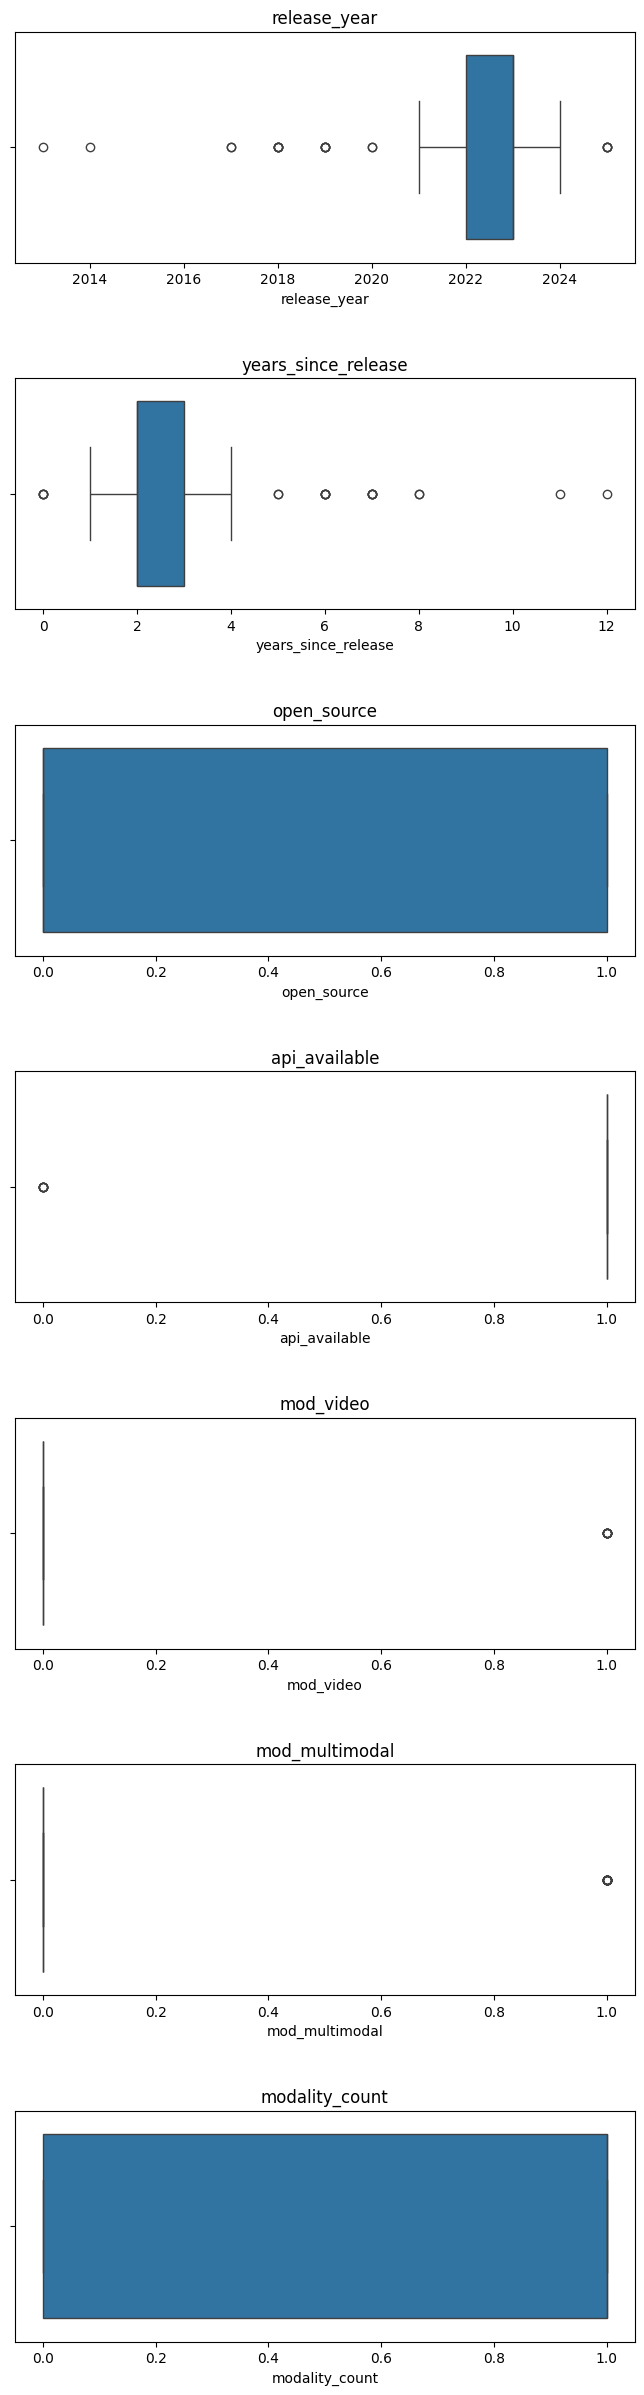

In [ ]:
#Graficas individuales para una vista rápida detectar inconsistecias datos numericos

col_numerico = ['release_year','years_since_release','open_source','api_available','mod_video','mod_multimodal','modality_count']
fig, ax = plt.subplots(nrows=7, ncols=1,figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_numerico):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

plt.show()

/tmp/ipython-input-2447277659.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipython-input-2447277659.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipython-input-2447277659.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipython-input-2447277659.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipython-input-2447277659.py:9: UserWarning: set_ticklabels() should only be used with a fix

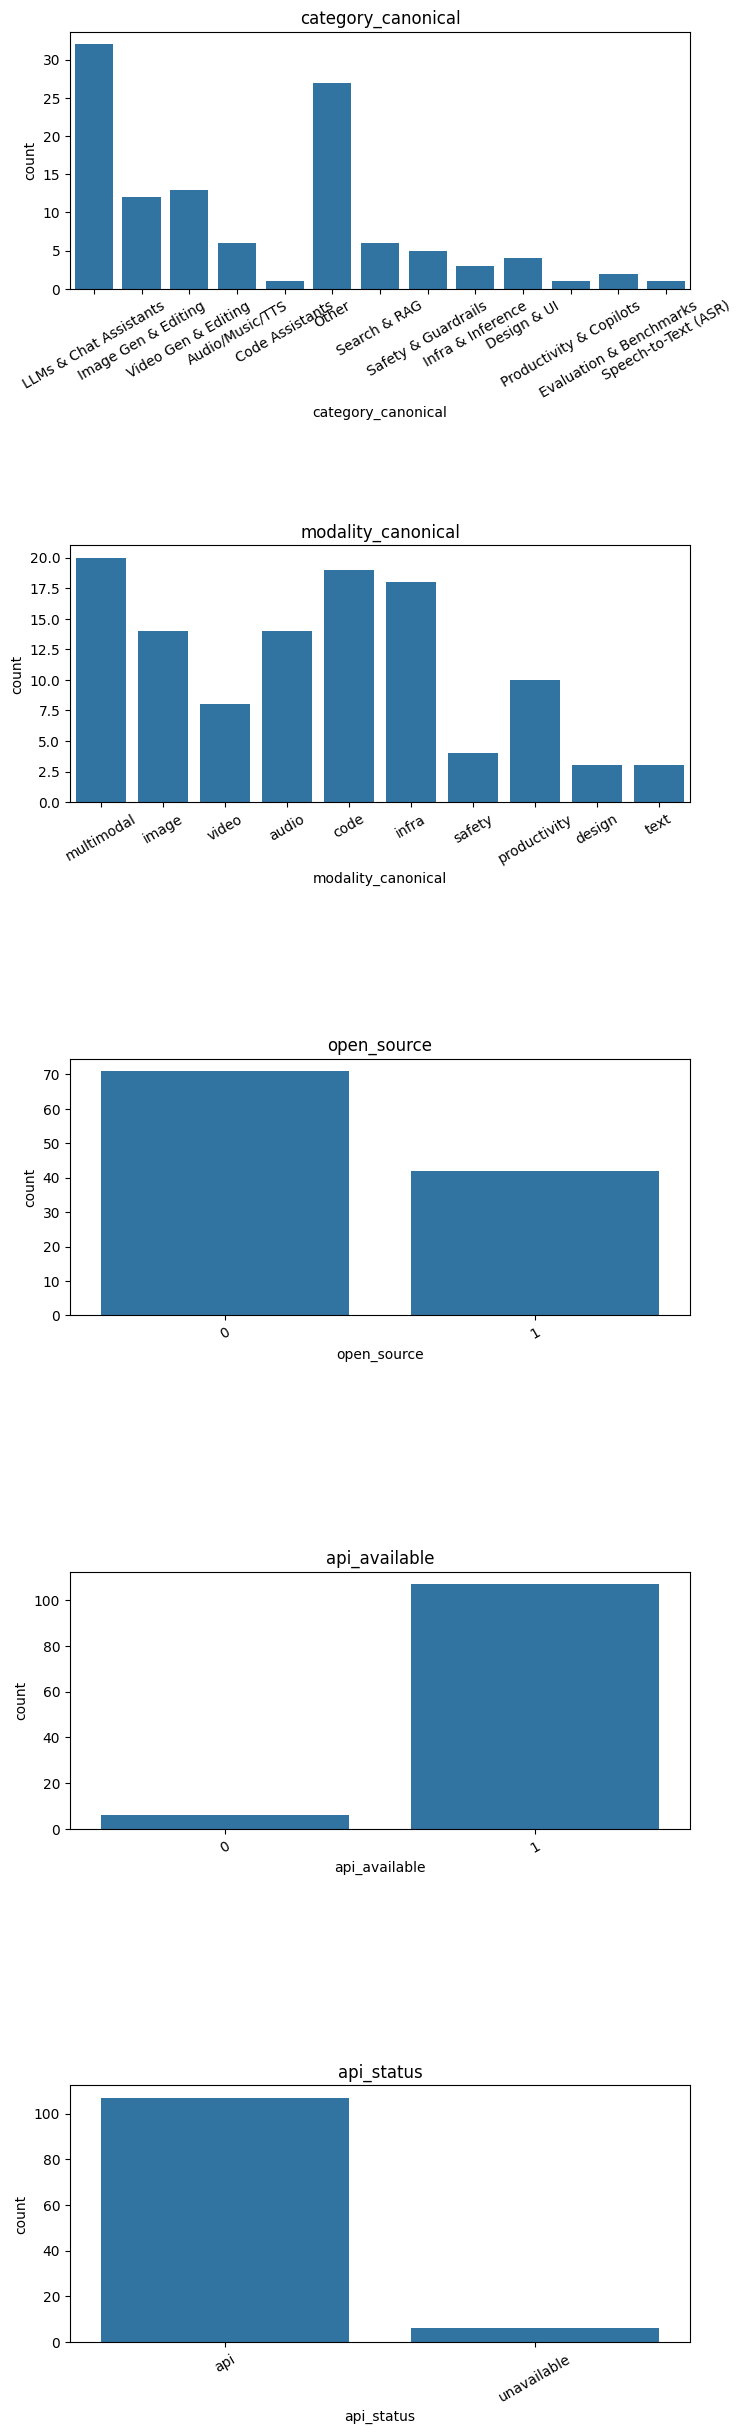

In [ ]:
#Graficas  Barra individuales para una vista rápida detectar inconsistecias en los datos categoricos
col_categoria = ['category_canonical','modality_canonical','open_source','api_available','api_status']
fig, ax = plt.subplots(nrows=5, ncols=1,figsize=(8,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(col_categoria):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

plt.show()

In [ ]:
#Cargar datos en MySQL (se ejecuta el script en https://www.mycompiler.io/)
'''user = "root"
password = "TU_CONTRASEÑA"
host = "127.0.0.1"
port = 3306
database = "Generative_AI"

engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}", echo=False)
df.to_sql("generative_ai_tools", con=engine, if_exists="replace", index=False)
print("✅ Datos cargados en MySQL correctamente")
'''

'user = "root"\npassword = "TU_CONTRASEÑA"\nhost = "127.0.0.1"\nport = 3306\ndatabase = "Generative_AI"\n\nengine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}", echo=False)\ndf.to_sql("generative_ai_tools", con=engine, if_exists="replace", index=False)\nprint("✅ Datos cargados en MySQL correctamente")\n'

In [ ]:
# cargar el nuevo archivo para el dash

In [ ]:
#DASHBOARD
df_dato=pd.DataFrame(df)
df_dato.head()

In [ ]:
#Gráfico: Open Source vs Closed Source por año
conteo = df.groupby(["release_year","open_source"]).size().unstack(fill_value=0).reset_index()
fig = px.bar(
    conteo, x="release_year", y=[0,1],
    title="Herramientas Open Source (1) vs Closed (0) por Año",
    labels={"value":"Cantidad","release_year":"Año"}
)
fig.show()

In [ ]:
#CELDA 8 — Gráfico circular Open vs Closed
fig2 = px.pie(df, names="open_source", title="Distribución Open Source (1) vs Closed (0)")
fig2.show()

In [ ]:
#CELDA 9 — Top categorías
top_cat = df["category_canonical"].value_counts().head(10).reset_index()
top_cat.columns = ["category","count"]

fig3 = px.bar(top_cat, x="category", y="count", title="Top categorías de herramientas")
fig3.show()

In [ ]:
#Últimos 5 años (solo open_source = 0)
max_year = df["release_year"].max()
ultimos_5 = list(range(max_year - 4, max_year + 1))

df_ult5 = df[df["release_year"].isin(ultimos_5)]
df_ult5_ceros = df_ult5[df_ult5["open_source"] == 0]

res = df_ult5_ceros.groupby("release_year").size().reset_index(name="total_ceros")
fig4 = px.bar(res, x="release_year", y="total_ceros", title="Cantidad open_source=0 últimos 5 años")
fig4.show()

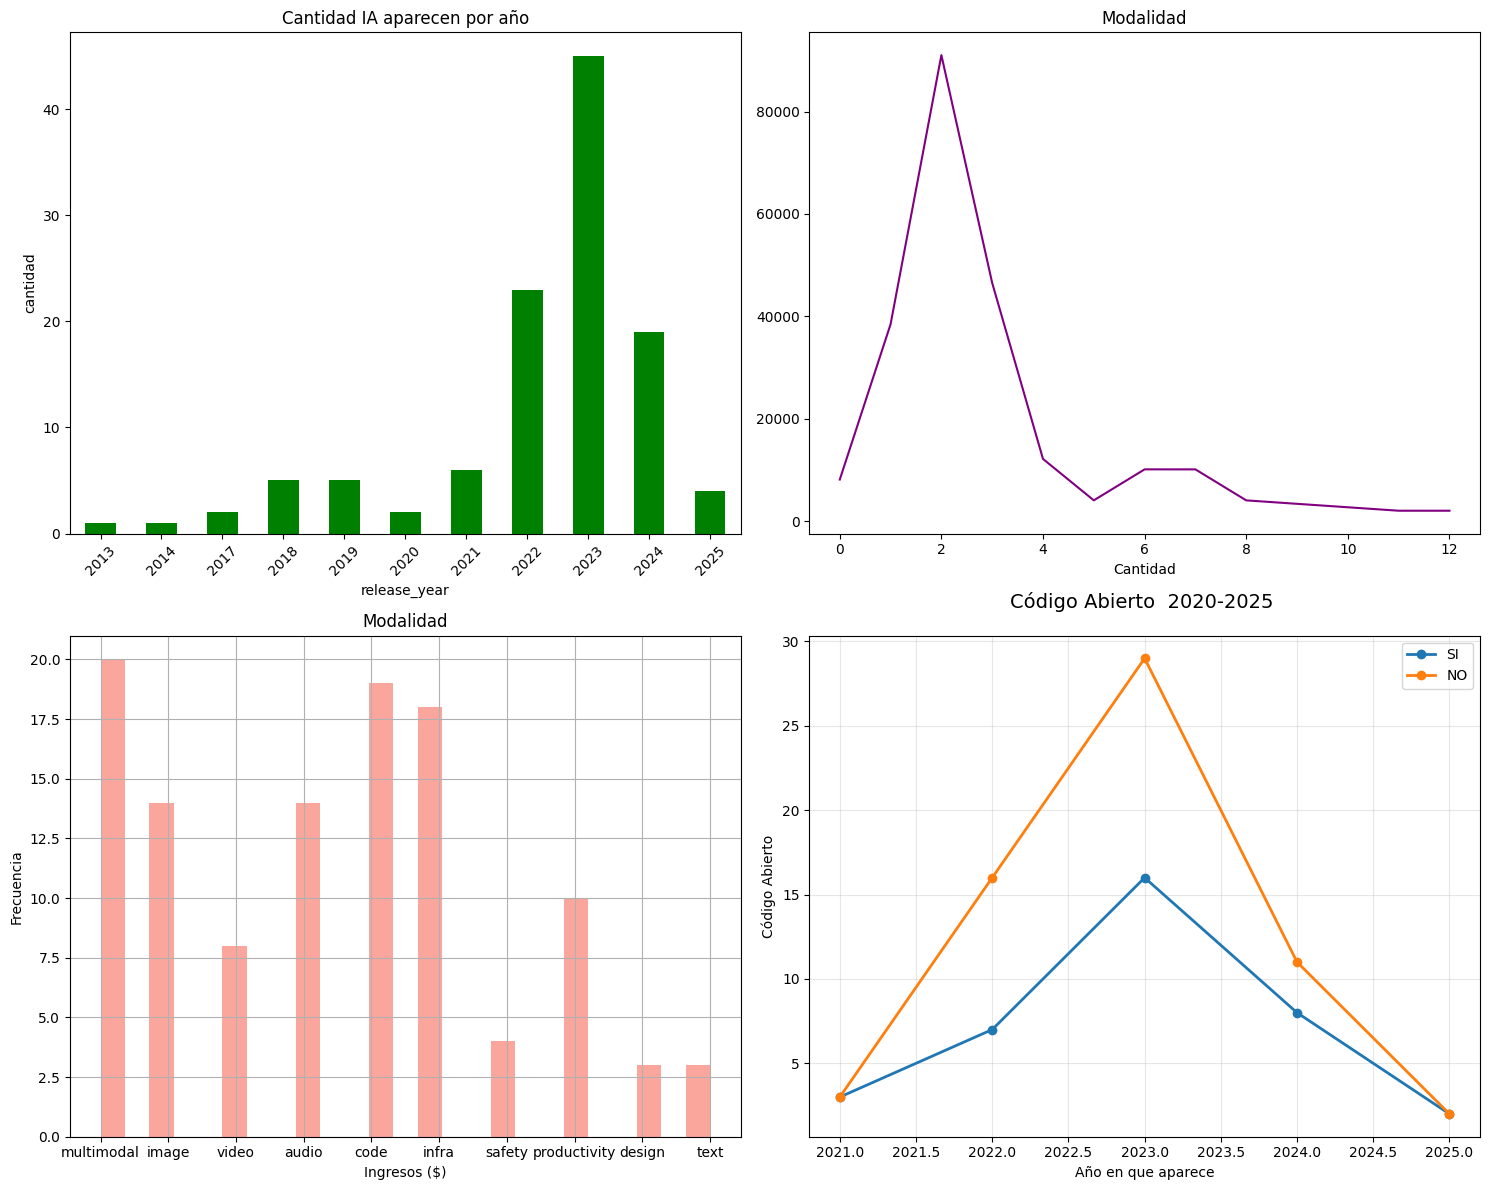

In [ ]:


#Grafico de Barras cantidad de Ia por Año
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

barra = df_dato.groupby('release_year')['company'].count()
barra.plot(kind='bar', ax=axes[0,0], color='green', title='Cantidad IA aparecen por año')
axes[0,0].set_ylabel('cantidad')
axes[0,0].tick_params(axis='x', rotation=45)



# 2. Gracico de Lineas
cano = df_dato.groupby('years_since_release')['release_year'].sum()
cano.plot(kind='line', ax=axes[0,1], color='purple', title='Modalidad')
axes[0,1].set_xlabel('Cantidad')



# 3. Modalidad (Histograma)
df_dato ['modality_canonical'].hist(bins=25, ax=axes[1,0], color='salmon', alpha=0.7)
axes[1,0].set_title('Modalidad')
axes[1,0].set_xlabel('Ingresos ($)')
axes[1,0].set_ylabel('Frecuencia')


# 4. Grafico de Lineas de las IA que son y no   Open Source agrupasdas por año
libre = (df.groupby("release_year")["open_source"].value_counts().unstack(fill_value=0).reset_index())

# Filtrar solo años mayores a 2020
libre = libre[libre["release_year"] > 2020]

# Grafico lineas   IA codigo abierto  por año
anios = libre['release_year'].head()
gratis =libre[1].head()
pago = libre[0].head()

#plt.figure(figsize=(10, 6))
plt.plot(anios, gratis, marker='o', label='SI', linewidth=2)
plt.plot(anios, pago, marker='o', label='NO', linewidth=2)

plt.title('Código Abierto  2020-2025 ', fontsize=14, pad=20)
plt.xlabel('Año en que aparece')
plt.ylabel('Código Abierto')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [ ]:
#Gráfico: Open Source vs Closed Source por año


In [ ]:
import plotly.express as px
fig = px.scatter(
    df,
    x="release_year",
    y="company",
    size="api_available",
    color="release_year",
    hover_name="release_year",
    log_x=True,
    animation_frame="category_canonical",
    animation_group="release_year"
)
fig.show()

In [ ]:

# 2.1) Línea: PBI per cápita promedio por continente (promedio simple)
df_line = df.groupby(["category_canonical", "release_year"], as_index=False)["api_available"].mean()

fig_line = px.line(
    df_line, x="release_year", y="category_canonical", color="category_canonical",
    title="Asitente de voz Predomina"
)
fig_line


*Conclusiones

In [ ]:
- Se exploraron herramientas generativas por año y tipo (Open vs Closed Source).
- Se identificaron las categorías con más presencia.
- Se verifico que en el año 2023 tiuvo un auge llegando a 45 herramienas de IA
- Se filtraron los últimos 5 años para observar tendencias recientes.
- En cuanto a la Modalidad en el 2021  infra fue la favorita, En el 2022  iamgen codigo , video y codigo  disminuyendo Infra,
  para 2023 Infra repunta  y supera a codigo, multimodal , imagen . Le sigue seguridad productidad , diseño multimodal aparece en el 2022  y sigue predominando hasta estos dias
  video se empezó a notar en el 2022 siendo el 2024 un alza

